In [9]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 1. Load and prepare a dataset
X, y = datasets.make_moons(n_samples=200, noise=0.2, random_state=42)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train SVM with linear and RBF kernel

In [8]:
# 2. Train SVM with linear kernel
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)

# 2. Train SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', C=1, gamma=1)
svm_rbf.fit(X_train, y_train)


def plot_decision_boundary(model, X, y, title):
    h = 0.02  # step size
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.2)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
    plt.title(title)
    plt.show()

Visualize decision boundaries

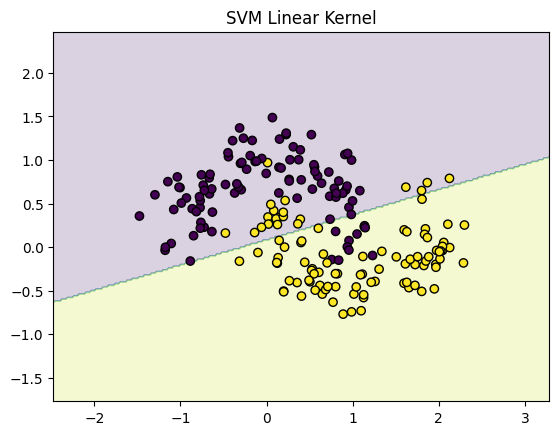

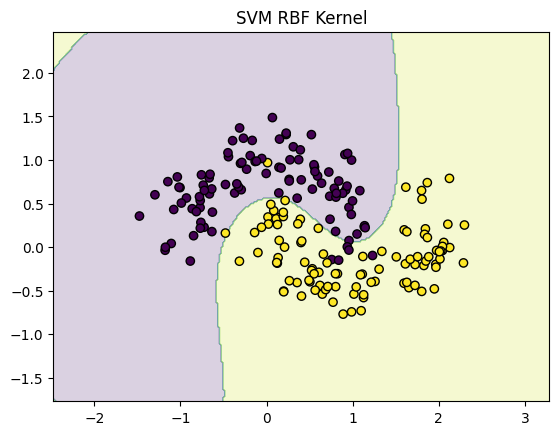

In [7]:

plot_decision_boundary(svm_linear, X, y, "SVM Linear Kernel")
plot_decision_boundary(svm_rbf, X, y, "SVM RBF Kernel")

 Tune hyperparameters using GridSearchCV

In [6]:

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 10]
}
grid = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)

Best parameters: {'C': 0.1, 'gamma': 10}


EVALUATE PERFORMANCE

In [5]:
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.925
